In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/rudranighosh/Downloads/um_internship/task3/Bird_Strikes_data.csv")


df['FlightDate'] = pd.to_datetime(df['FlightDate'])


In [62]:
print(df.head())

   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                     None 2001-07-25   
2                             261        

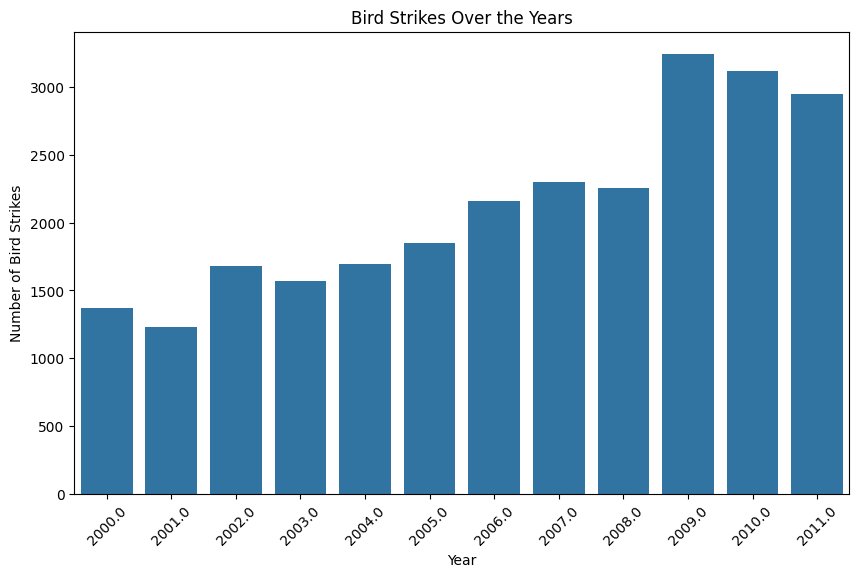

In [63]:
# number of bird strikes over the years
plt.figure(figsize=(10, 6))
sns.countplot(x=df['FlightDate'].dt.year)
plt.title('Bird Strikes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()



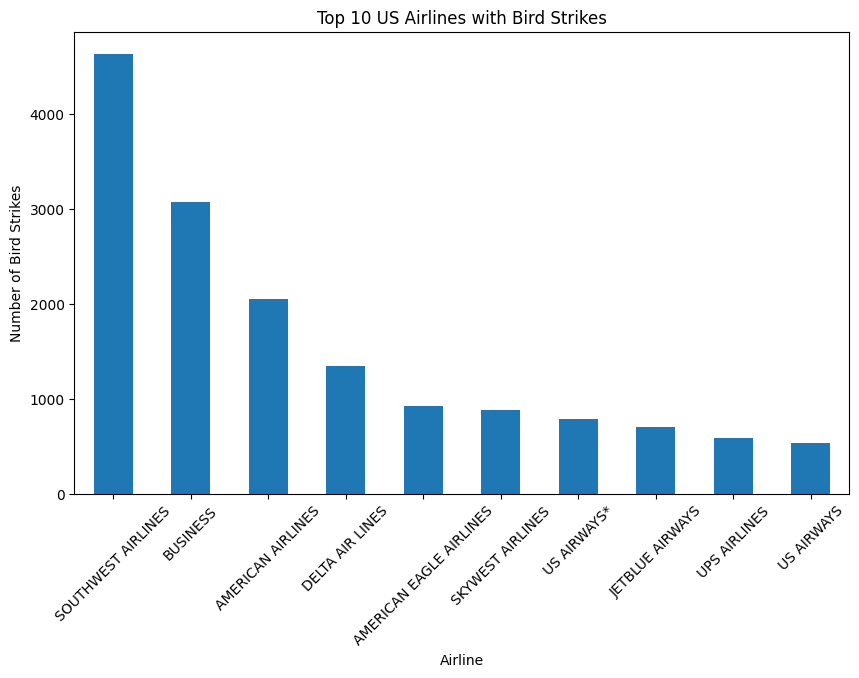

In [64]:
# top 10 US airlines in terms of encountering bird strikes
top_airlines = df['Aircraft: Airline/Operator'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar')
plt.title('Top 10 US Airlines with Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()



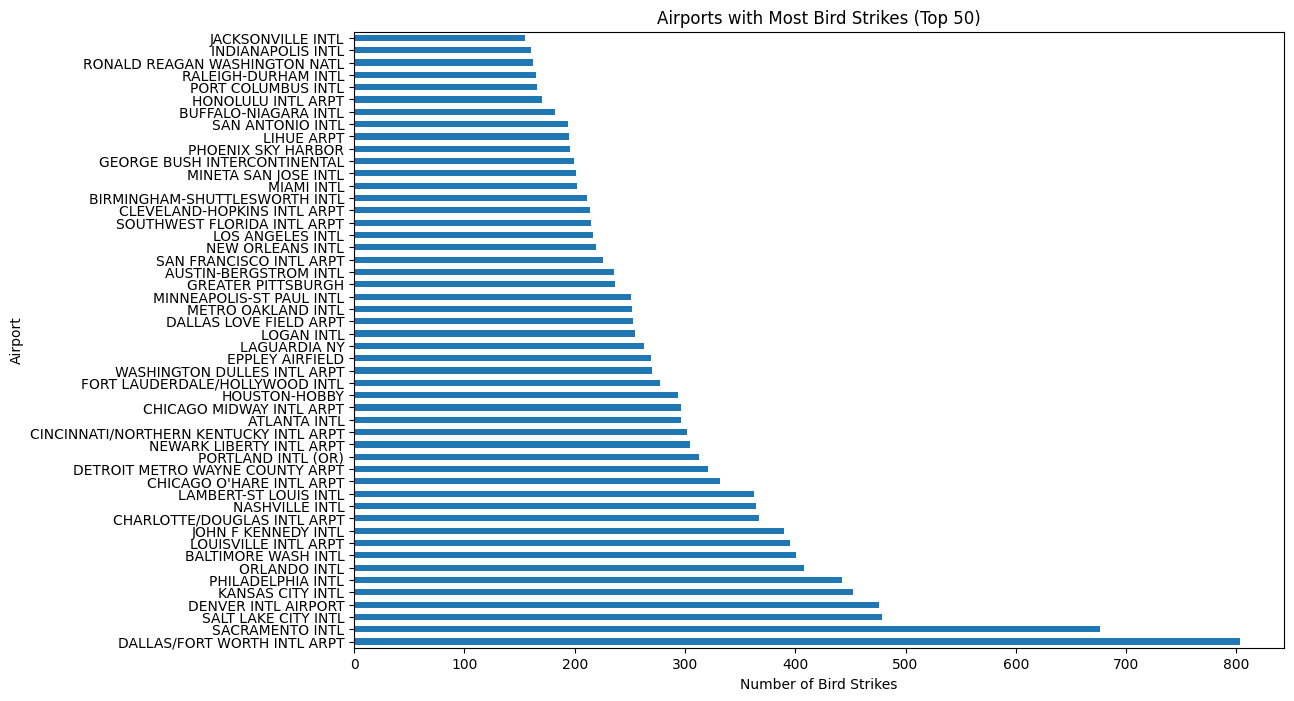

In [65]:
# airports with the most incidents of bird strikes (Top 50)
top_airports = df['Airport: Name'].value_counts().head(50)
plt.figure(figsize=(12, 8))
top_airports.plot(kind='barh')
plt.title('Airports with Most Bird Strikes (Top 50)')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.show()



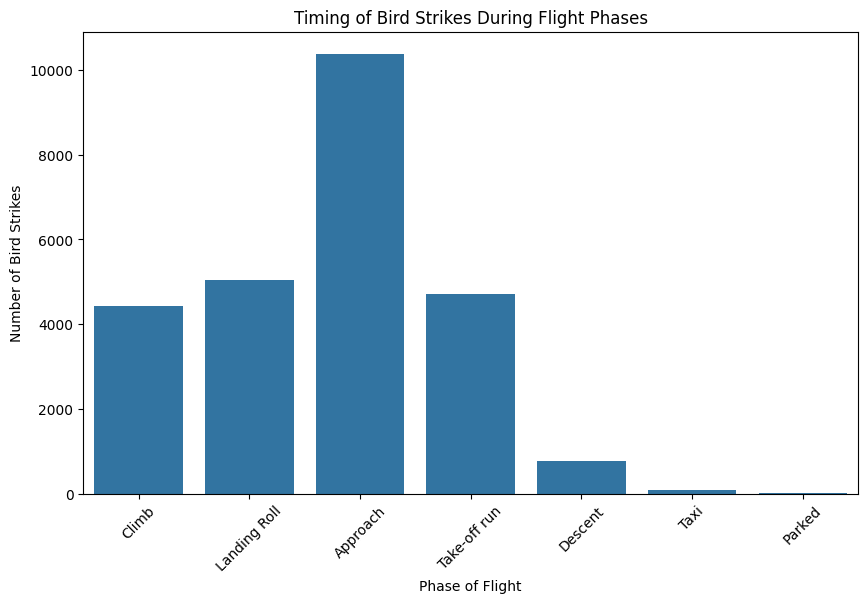

In [66]:
#timing of bird strikes during different phases of flight
plt.figure(figsize=(10, 6))
sns.countplot(x=df['When: Phase of flight'])
plt.title('Timing of Bird Strikes During Flight Phases')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

# Advanced Analysis
# For example, using machine learning for prediction or clustering

# Dashboard Creation
# For example, using Dash or other dashboarding tools

# Documentation and Presentation
# Document the analysis process, findings, and recommendations


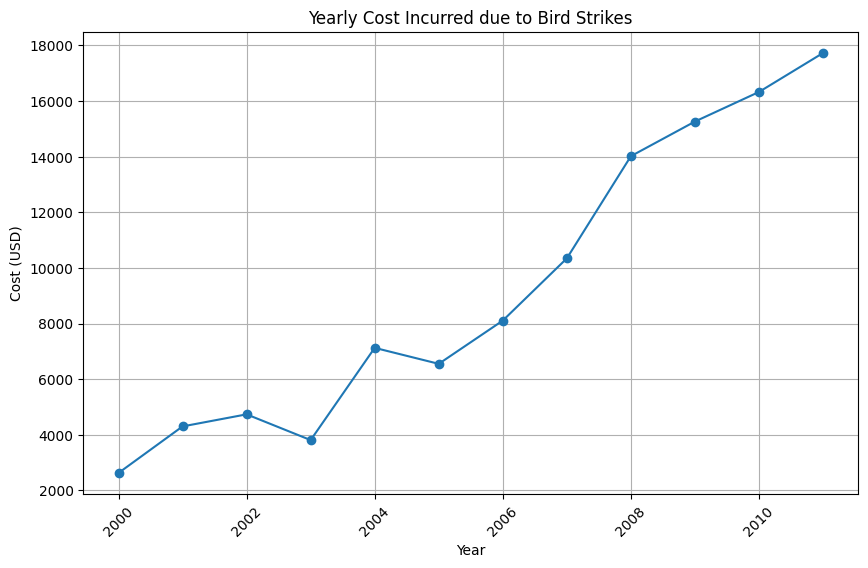

In [67]:
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')
df.dropna(subset=['Cost: Total $'], inplace=True)

# plot of the yearly cost incurred due to bird strikes
plt.figure(figsize=(10, 6))
yearly_cost = df.groupby(df['FlightDate'].dt.year)['Cost: Total $'].sum()
yearly_cost.plot(marker='o')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Cost (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


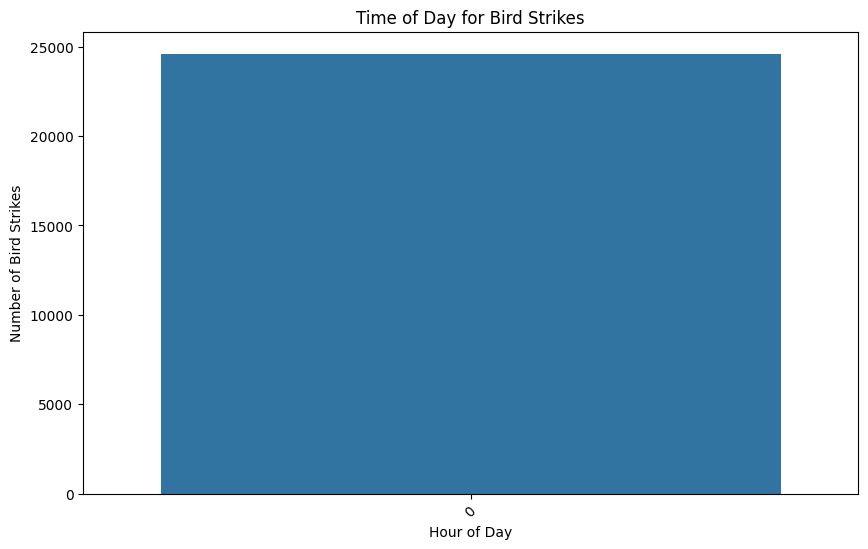

In [68]:
# Convert 'FlightDate' column to datetime, coercing errors to NaN
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Drop rows with NaN values in 'FlightDate' column
df.dropna(subset=['FlightDate'], inplace=True)

# Now, plot the time of day for bird strikes
plt.figure(figsize=(10, 6))
sns.countplot(x=df['FlightDate'].dt.hour)
plt.title('Time of Day for Bird Strikes')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


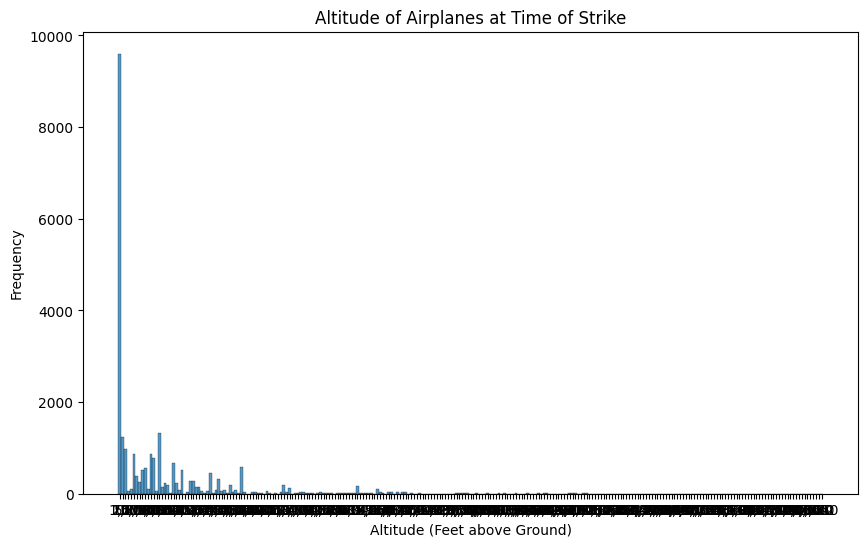

In [69]:
# Altitude of airplanes at the time of strike
plt.figure(figsize=(10, 6))
sns.histplot(df['Feet above ground'], bins=20)
plt.title('Altitude of Airplanes at Time of Strike')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Frequency')
plt.show()



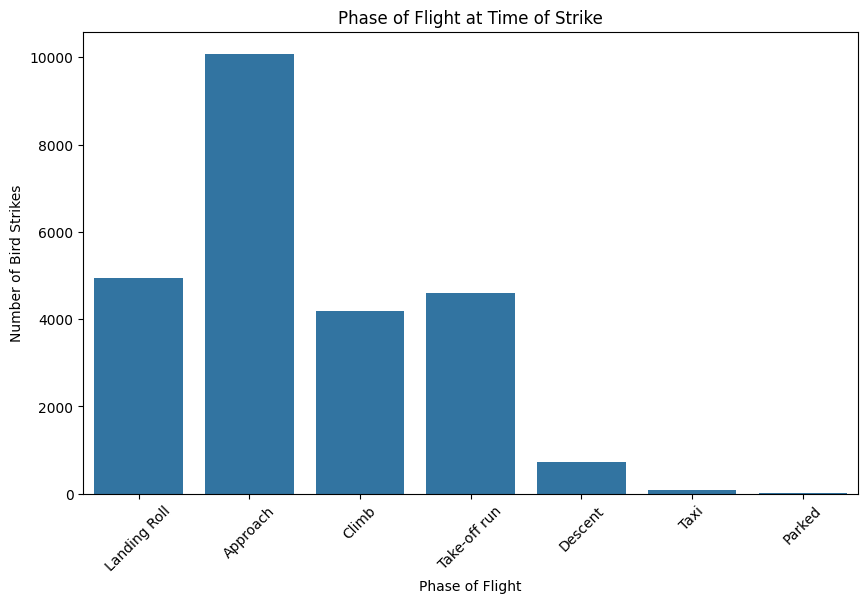

In [70]:
# Phase of flight at the time of the strike
plt.figure(figsize=(10, 6))
sns.countplot(x=df['When: Phase of flight'])
plt.title('Phase of Flight at Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()



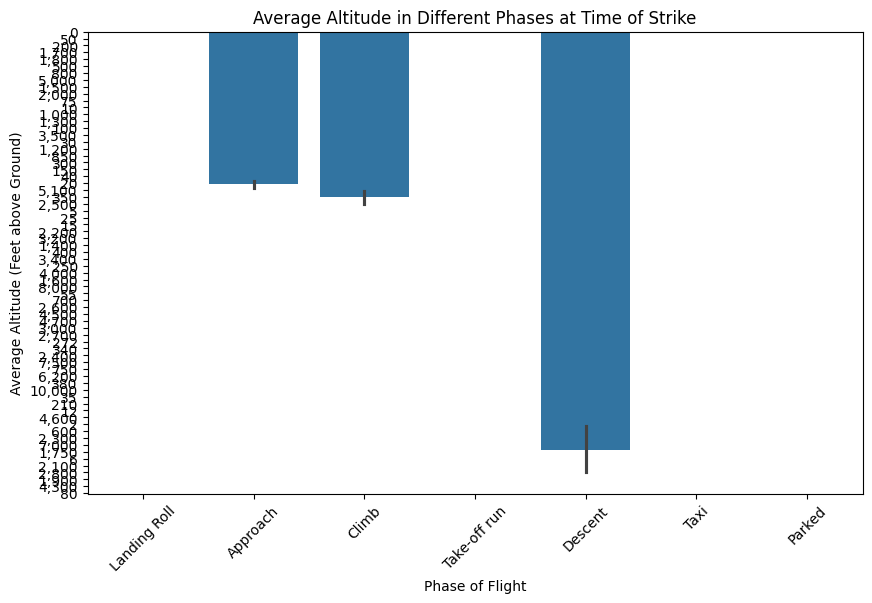

In [71]:
# Average Altitude of the airplanes in different phases at the time of strike
plt.figure(figsize=(10, 6))
sns.barplot(x='When: Phase of flight', y='Feet above ground', data=df, estimator='mean')
plt.title('Average Altitude in Different Phases at Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.show()



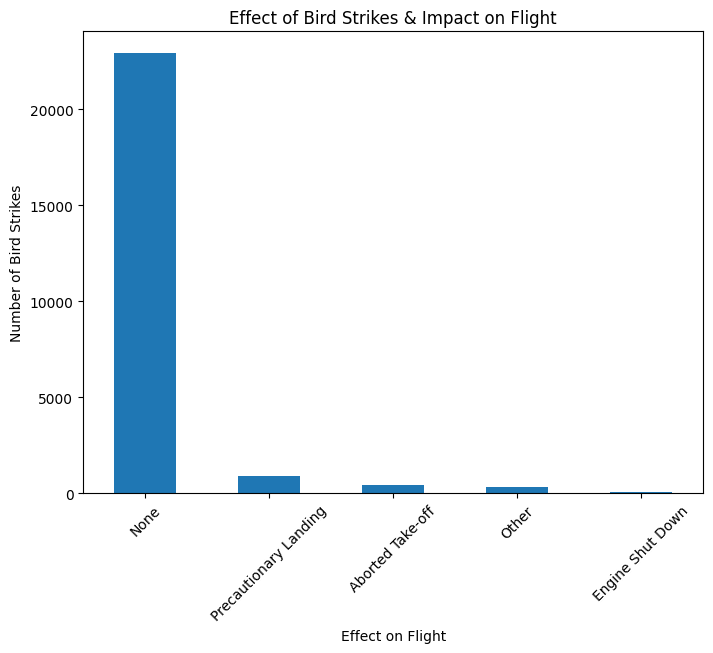

In [72]:
# Effect of Bird Strikes & Impact on Flight
effect_counts = df['Effect: Impact to flight'].value_counts()
plt.figure(figsize=(8, 6))
effect_counts.plot(kind='bar')
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Effect on Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


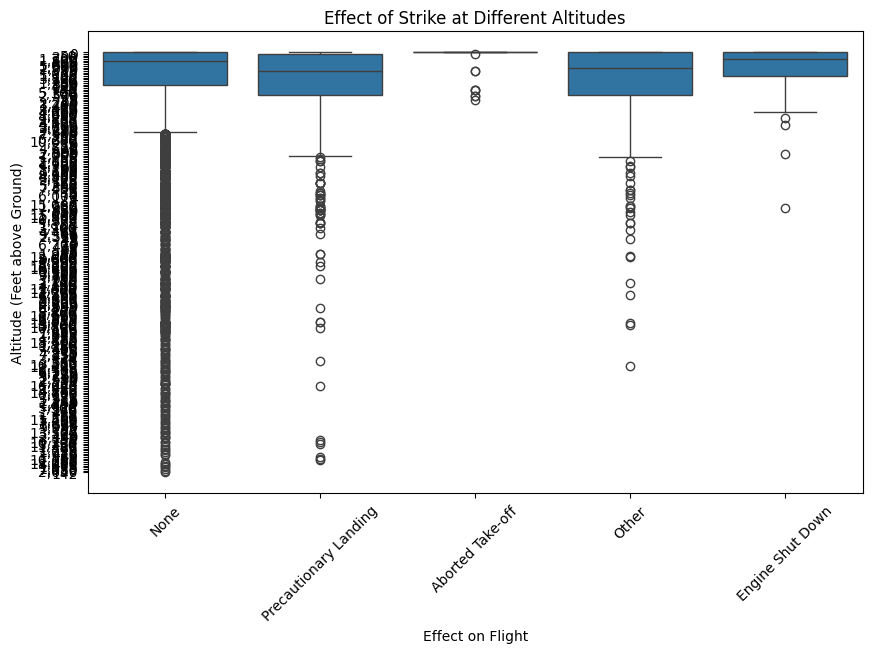

In [73]:

# Effect of Strike at Different Altitude
plt.figure(figsize=(10, 6))
sns.boxplot(x='Effect: Impact to flight', y='Feet above ground', data=df)
plt.title('Effect of Strike at Different Altitudes')
plt.xlabel('Effect on Flight')
plt.ylabel('Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.show()



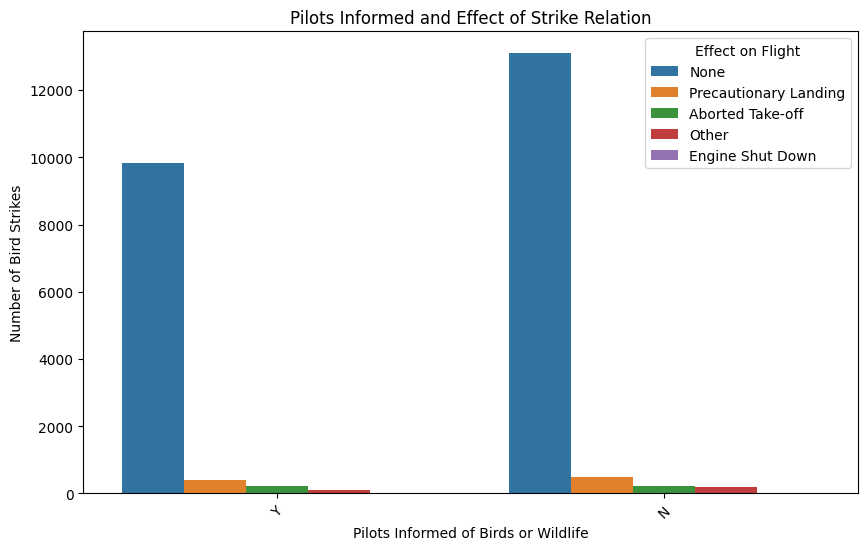

In [74]:
# Were Pilots Informed? & Prior Warning and Effect of Strike Relation
plt.figure(figsize=(10, 6))
sns.countplot(x='Pilot warned of birds or wildlife?', hue='Effect: Impact to flight', data=df)
plt.title('Pilots Informed and Effect of Strike Relation')
plt.xlabel('Pilots Informed of Birds or Wildlife')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Effect on Flight')
plt.xticks(rotation=45)
plt.show()
